In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Cargar el dataset
df = pd.read_csv(r'C:\Users\james\OneDrive\Documentos\PREGRADO UPAO\CICLO 9\Tesis I\BackEnds\EduForgeF\EduForge\data\raw\students.csv')

In [52]:
# Convertir "grado" en variable numérica
grado_map = {'Primero': 1, 'Segundo': 2, 'Tercero': 3, 'Cuarto': 4, 'Quinto': 5}
df['grado'] = df['grado'].map(grado_map)

In [53]:
# Crear la columna 'desercion' basada en calificación y asistencia
df['desercion'] = ((df['calificacion'] < 10) | (df['asistencia'] < 70)).astype(int)

In [54]:
# Asignar los pesos (esto puede ser opcional, ya que Random Forest ajustará la importancia automáticamente)
df['calificacion'] = df['calificacion']
df['asistencia'] = df['asistencia']
df['conducta'] = df['conducta']

In [55]:
# Definir las características (features) y la etiqueta (target)
X = df[['grado', 'calificacion', 'asistencia', 'conducta']]  # Características
y = df['desercion']  # Etiqueta (target)

In [56]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [58]:
# Inicializar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [59]:
# Validación cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores)}")

Cross-Validation Scores: [0.99875 1.      1.      1.      1.     ]
Mean Accuracy: 0.99975


In [60]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

In [61]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       387

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



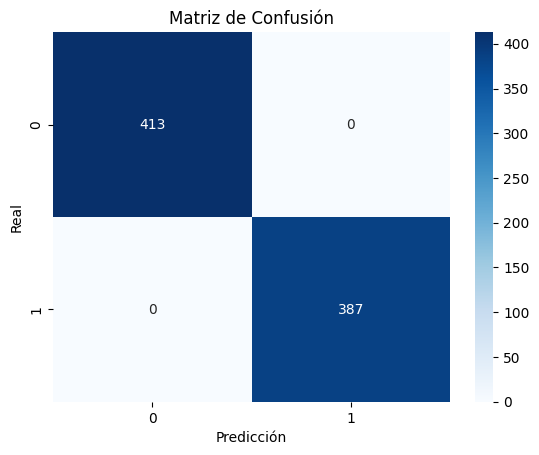

In [62]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()